# Visualizations

Notebook di appoggio per la realizzazione delle visualizzazioni per la presentazione.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import qiime2
from tempfile import mkdtemp
import pandas as pd
import seaborn as sns
from qiime2.plugins import demux

In [2]:
workdir = '/home/faber6911/Biosciences_assignments/FINAL_ASSIGNMENT/rawData/qiime2Artifact/'

## Quality plot Qiime2

In [12]:
# artifact = qiime2.Artifact.import_data('SampleData[SequencesWithQuality]',
#                                                    workdir+'fastq_manifestNoAlcoholNoSmoke.tsv',
#                                                   view_type = 'SingleEndFastqManifestPhred33V2')
# artifact.save(workdir+'seqNoAlcoholNoSmoke_artifact.qza')
artifact = qiime2.Artifact.load(workdir + 'seqNoAlcoholNoSmoke_artifact.qza')

<visualization: Visualization uuid: de474569-7e0e-4a9c-80e3-072243256ac4>

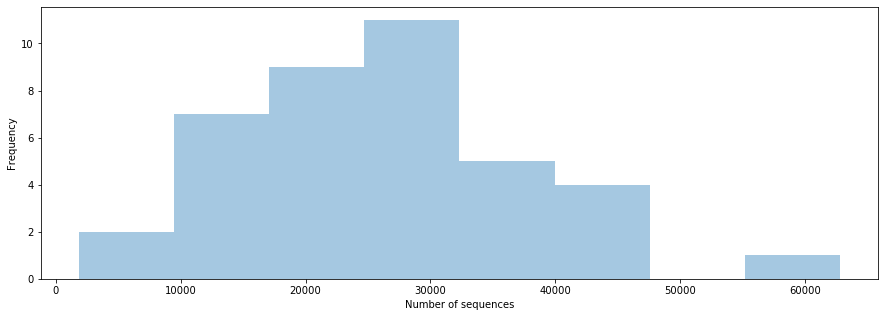

In [13]:
plt.figure(figsize = (15, 5))
demux_sequences = demux.visualizers.summarize(artifact)
demux_sequences.visualization

## Plot divisione di genere del campione

In [16]:
df = pd.read_csv('datasets/sample_metadata_clean.tsv', sep='\t', dtype=str)

df = df[df.sex != 'Not provided']

<Figure size 1080x432 with 0 Axes>

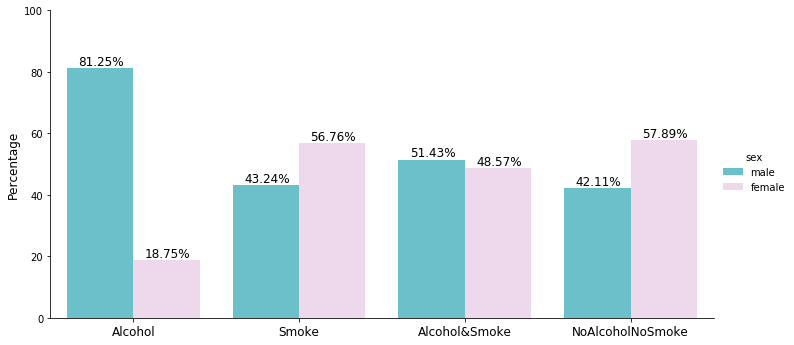

In [76]:
x, y = 'label', 'sex'
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('Percentage').reset_index()

plt.figure(figsize = (15, 6))
g = sns.catplot(x=x,y='Percentage',hue=y,kind='bar',data=df1,height=5, aspect = 2,
               palette = sns.color_palette(['#5BCCDA', '#F2D4ED']))
g.ax.set_ylim(0,100)
plt.xticks([0,1,2,3], ['Alcohol', 'Smoke', 'Alcohol&Smoke', 'NoAlcoholNoSmoke'], size = 12)
plt.xlabel('')
plt.ylabel('Percentage', size = 12)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x()+.07
    txt_y = p.get_height()+1
    g.ax.text(txt_x,txt_y,txt, size = 12)

## Plot distribuzione età per campione

In [3]:
df = pd.read_csv('datasets/sample_metadata_clean.tsv', sep='\t', dtype=str)
df = df[df.age_years != 'Not provided']
df = df[df.age_years != 'Unspecified']
df.age_years = df.age_years.astype(float)
df.shape

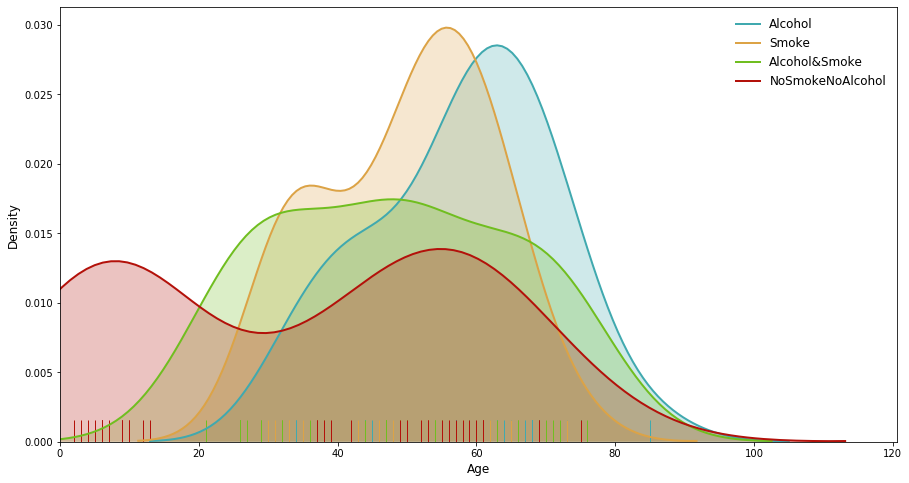

In [60]:
plt.figure(figsize = (15, 8))
label_dict = {0:'Alcohol', 1:'Smoke', 2:'Alcohol&Smoke', 3:'NoSmokeNoAlcohol'}
color_dict = {0:'#40A9AF', 1:'#DCA346', 2:'#70BE20', 3:'#B3110A'}
for label in range(4):
    sns.distplot(df.age_years[df.label == str(label)], hist = False, kde = True, kde_kws={'shade':True, 'linewidth':2},
                 rug = True, label = label_dict[label], color = color_dict[label])
    
plt.xlabel('Age', size = 12)
plt.ylabel('Density', size = 12)
plt.xlim(0)
plt.legend(frameon = False, prop = {'size':12})

## Plot distribuzione peso per campione

In [61]:
df = pd.read_csv('datasets/sample_metadata_clean.tsv', sep='\t', dtype=str)
df = df[df.weight_kg != 'Not provided']
df.weight_kg = df.weight_kg.astype('float')

Text(0, 0.5, 'Weight')

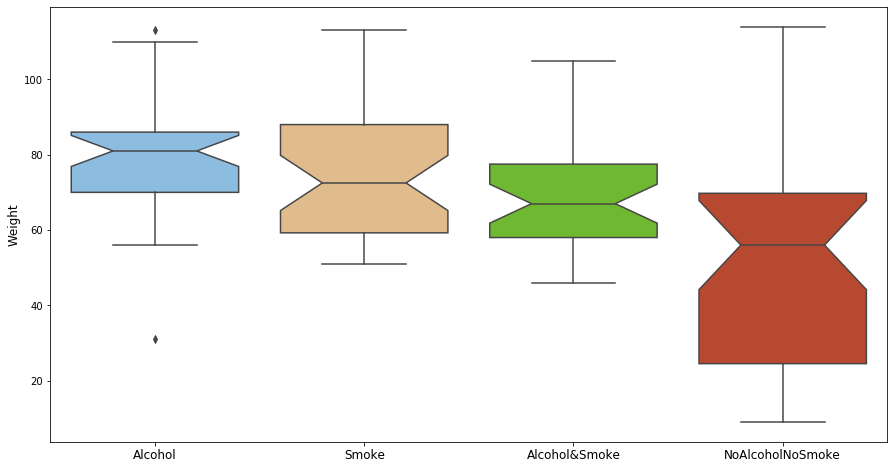

In [90]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = 'label', y = 'weight_kg', data = df,
            notch = True, palette = sns.color_palette(['#7EBFEE', '#EEBE7E', '#6DCF1A', '#CF3B1A']))
plt.xticks([0,1,2,3], ['Alcohol', 'Smoke', 'Alcohol&Smoke', 'NoAlcoholNoSmoke'], size = 12)
plt.xlabel('')
plt.ylabel('Weight', size = 12)

## Plot distribuzione etnica

In [123]:
df = pd.read_csv('datasets/sample_metadata_clean.tsv', sep='\t', dtype=str)
df = df[df.race != 'Not provided']
df.shape

(149, 16)

Text(0.5, 0, 'Count')

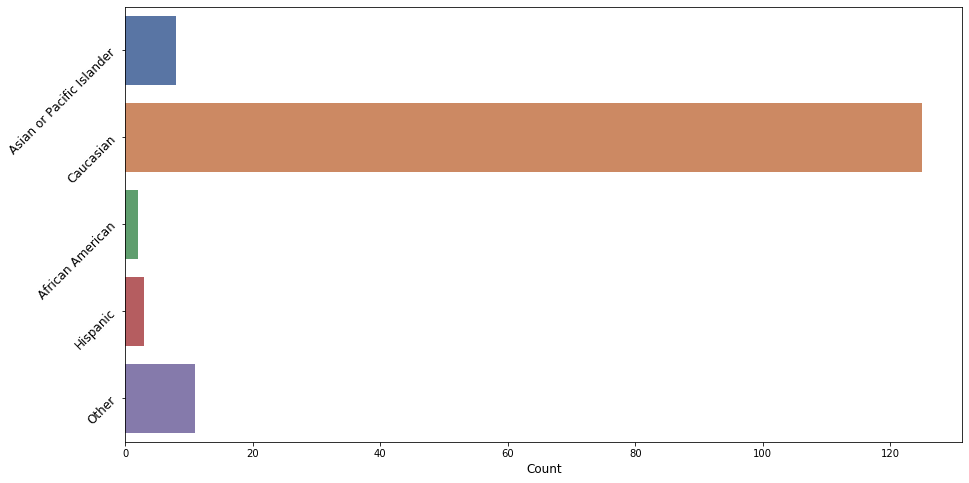

In [122]:
plt.figure(figsize = (15, 8))
ax = sns.countplot(y = df.race, orient = 'h', palette = sns.color_palette(palette = 'deep', n_colors=5),
                  order = ['Asian or Pacific Islander', 'Caucasian', 'African American', 'Hispanic', 'Other'])
plt.yticks(rotation = 45, size = 12)
plt.ylabel('')
plt.xlabel('Count', size = 12)
#ax.set_yticklabels(['Asian or Pacific Islander', 'Caucasian', 'African American', 'Hispanic', 'Other'])

## Albero filogenetico

In [5]:
df = pd.read_csv('processedData\\sequences_taxa.csv', index_col = 0)